### 비지도 학습과 데이터전처리

##### 1. 비지도 학습의 종류
비지도 학습의 종류는 데이터의 `비지도변환(unsupervised transformation)`과 `군집(Clustering)`이다.

1. `비지도변환` : 오리지널 데이터를 표현하는 방법인 `차원축소(dimensionality reduction)`이다. 차원 축소의 대표적인 예는 시각화를 위해 데이터셋을 2차원으로 변경하는 경우이다.

2. `군집알고리즘` : 데이터를 비슷한 것끼리 그룹으로 묶는 것이다.

##### 2. 데이터 전처리와 스케일 조정

전처리방법의 종류

* `StandardScaler` : 각 특성의 평균 =0,분산 =1로 변경. 이방법은 특성의 최소, 최대값을 제한하지 않는다. 
* `RobustScaler` : StandardScaler와 비슷하지만 평균과 분산 대신에 `중앙값 Median, 4분위 값 quartile`을 사용한다. 이런 방식 때문에 이상치등에 영향을 별로 받지 않는다.
* `MinMaxScaler` : 모든 특성들이 정확하게 0~1사이에 위치하도록 데이터를 변경

* `Normalizer` : 매우 다른 스케일 조정방법이다. 이 방식은 `특성벡터의 유클리디안거리가 1`이 되도록 데이터포인터를 조정한다. 다른말로 지금이 1인 원(3차원일 때는 구)에 데이터를 투영한다.

In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.rcParams['font.family']='NanumGothicCoding'
plt.rcParams['axes.unicode_minus']=False
# plt.rcParams['figure.dpi']=100
# plt.rcParams['image.cmap']="gray"
# plt.rcParams['axes.xmargin']=0.05
# plt.rcParams['axes.ymargin']=0.05

import mglearn

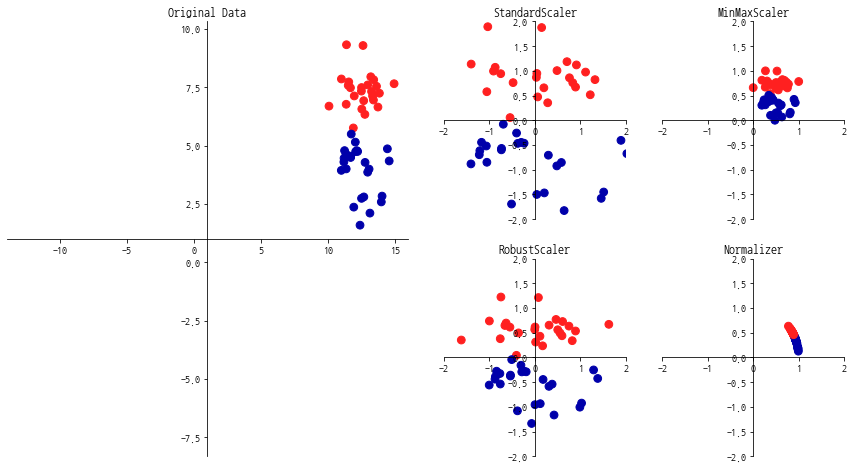

In [2]:
# 스케일 조정을 위한 인위적인 데이터셋
mglearn.plots.plot_scaling()

# 첫 번째 그래프는 2개의 특성을 인위적을 만든 이진 분류의 데이터셋
# 특성1(x값)은 10~15사이의 값, 특성2(값)은 1~10까지의 값

##### 실습1. 유방암데이터변환

유방암데이터셋에 SVM과 MinMaxScaler를 적용

In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

cancer = datasets.load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,random_state=0)

print()


In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

# 데이터변환
X_train_scaled =scaler.transform(X_train)
print("변환후 데이터크기 : {}".format(X_train_scaled.shape))
print("스케일 조정전 특성별 최소값 {}".format(X_train.min(axis=0)))
print("스케일 조정전 특성별 최대값 {}".format(X_train.max(axis=0)))

print("스케일 조정후 특성별 최소값 {}".format(X_train_scaled.min(axis=0)))
print("스케일 조정전 특성별 최대값 {}".format(X_train_scaled.max(axis=0)))


변환후 데이터크기 : (426, 30)
스케일 조정전 특성별 최소값 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 4.996e-02 1.115e-01 3.628e-01 7.570e-01 7.228e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 7.882e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.565e-01 5.504e-02]
스케일 조정전 특성별 최대값 [2.811e+01 3.381e+01 1.885e+02 2.501e+03 1.447e-01 3.114e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 2.333e-02 1.064e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.903e-01
 6.638e-01 2.075e-01]
스케일 조정후 특성별 최소값 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 조정전 특성별 최대값 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [5]:
# 검증용데이터셋도 스케일조정
X_test_scaled=scaler.transform(X_test)
print("스케일 조정 후 특성별 최소값: {}".format(X_test_scaled.min(axis=0)))
print("스케일 조정 후 특성별 최대값: {}".format(X_test_scaled.max(axis=0)))
# 결과분석
# 스케일을 조정한 테스트 셋의 최소값은 0~1사이의 값이 아니라 0~1사이의 범위를 벗어났다.
# 그 이유는 scaler 가 훈련용으로 스케일 조정이 되었기 때문에 결과는 0~1의 범위를 벗어난다.

스케일 조정 후 특성별 최소값: [ 0.03540158  0.04190871  0.02895446  0.01497349  0.14260888  0.04999658
  0.          0.          0.07222222  0.00589722  0.00105015 -0.00057494
  0.00067851 -0.0007963   0.05148726  0.01434497  0.          0.
  0.04195752  0.01113138  0.03678406  0.01252665  0.03366702  0.01400904
  0.08531995  0.01833687  0.          0.          0.00749064  0.02367834]
스케일 조정 후 특성별 최대값: [0.76809125 1.22697095 0.75813696 0.64750795 1.20310633 1.11643038
 0.99906279 0.90606362 0.93232323 0.94903117 0.45573058 0.72623944
 0.48593507 0.31641282 1.36082713 1.2784499  0.36313131 0.77476795
 1.32643996 0.72672498 0.82106012 0.87553305 0.77887345 0.67803775
 0.78603975 0.87843331 0.93450479 1.0024113  0.76384782 0.58743277]


###### 훈련용과 검증용 데이터의 스케일을 동일 한 방법으로 조정하기

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

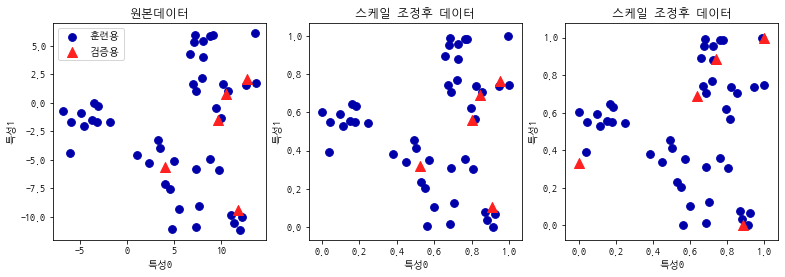

In [6]:
X, _ = datasets.make_blobs(n_samples=50,centers=5,random_state=4,cluster_std=2)

X_train, X_test = train_test_split(X, random_state=5,test_size=0.1)

# 시각화
fig ,axes = plt.subplots(1,3,figsize=(13,4))

# 1. 원본데이터의 시각화
axes[0].scatter(X_train[:,0],X_train[:,1],c=mglearn.cm2(0),label="훈련용",s=60)
axes[0].scatter(X_test[:,0],X_test[:,1],c=mglearn.cm2(1),label="검증용",s=100,marker='^')
axes[0].legend(loc="upper left")
axes[0].set_title("원본데이터")

# 2. 스케일 후 데이터의 시각화

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

axes[1].scatter(X_train_scaled[:,0],X_train_scaled[:,1],c=mglearn.cm2(0),label="훈련용",s=60)
axes[1].scatter(X_test_scaled[:,0],X_test_scaled[:,1],c=mglearn.cm2(1),label="검증용",s=100,marker='^')
axes[1].set_title("스케일 조정후 데이터")

# 2. 잘못된 스켈후 데이터의 시각화
# 검증용 셋의 스케일을 따로로 조정(이 예는 실습을 위한 것을 절대 이런 방식으로 하면 안됨)
# scaler.fit는 train만 하고 테스트 자로료 따로 하면 안된다.
test_scaler =MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly =test_scaler.transform(X_test)
axes[2].scatter(X_train_scaled[:,0],X_train_scaled[:,1],c=mglearn.cm2(0),label="훈련용",s=60)
axes[2].scatter(X_test_scaled_badly[:,0],X_test_scaled_badly[:,1],c=mglearn.cm2(1),label="검증용",s=100,marker='^')
axes[2].set_title("스케일 조정후 데이터")

for ax in axes:
    ax.set_xlabel("특성0")
    ax.set_ylabel("특성1")
plt.show()

# 결과분석
# 첫번째 그래프는 원본데이터셋, 두번째는 MinMaxScaler로 스케이조정
# 훈련세트를 fit()메서드적용후, 훈련,검증세트에 transform()메서드 적용
# 축의 눈금만 0~1범위로 변경된 것만 빼면 첫번쨰, 두번째는 동일하다. 
# 세번째는 훈련,검증셋에 서로 다른 방식의 스케일을 적용했을 때 나타나는 오류이다.

In [7]:
# 메서드 체이닝 기법을 사용
X_scaled = scaler.fit(X_train).transform(X_train)

# 상기와 결과는 동일하지만 fit_transform()함수사용이 도 효과적
X_scaled_d = scaler.fit_transform(X_train) 

###### 2) 유방암데이터를 스케일조정 후 SVM으로 기계학습

In [8]:
from sklearn.svm import SVC
cancer = datasets.load_breast_cancer()
# 1. 스케일 조정전 SVM 기계학습
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,random_state=0)

svm = SVC(C=100).fit(X_train, y_train)
print("검정용 세트의 정확도: {:.3f}".format(svm.score(X_test,y_test)))

검정용 세트의 정확도: 0.944


In [9]:
# 2. 스케일조정후 SVM 기계학습
scaler =MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 조정후 SVM 학습
svm = SVC(C=100).fit(X_train_scaled,y_train)
print("검정용 세트의 정확도: {:.3f}".format(svm.score(X_test_scaled,y_test)))

검정용 세트의 정확도: 0.965


##### 3 ) 유방암 데이터를 StandardScaler 스케일 조정 후 sVM으로 기계학습

* 평균 =0, 분산 =1 사이의 값을 갖도록 조정 

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_scaled =scaler.transform(X_train)
X_test_scaled =scaler.transform(X_test)

# 조정후 SVM 학습
svm = SVC(C=100).fit(X_train_scaled,y_train)
print("조정 후 검증용 세트의 정확도: {:.3f}".format(svm.score(X_test_scaled,y_test)))

조정 후 검증용 세트의 정확도: 0.958


###### 연습문제
 유방암, IRIS데이터셋을 가지고 스케일 조정 전후 비교 및 시각화를 실행
 머신러닝 알고리즘은 SVM, KMeans 2개의 알고리즘을 적용

In [11]:
from sklearn.cluster import KMeans
import sklearn.metrics as sm

In [12]:
# 암데이터 SVN
cancer = datasets.load_breast_cancer()
for n, i in enumerate(cancer.feature_names):
    print(n,":",i)

0 : mean radius
1 : mean texture
2 : mean perimeter
3 : mean area
4 : mean smoothness
5 : mean compactness
6 : mean concavity
7 : mean concave points
8 : mean symmetry
9 : mean fractal dimension
10 : radius error
11 : texture error
12 : perimeter error
13 : area error
14 : smoothness error
15 : compactness error
16 : concavity error
17 : concave points error
18 : symmetry error
19 : fractal dimension error
20 : worst radius
21 : worst texture
22 : worst perimeter
23 : worst area
24 : worst smoothness
25 : worst compactness
26 : worst concavity
27 : worst concave points
28 : worst symmetry
29 : worst fractal dimension


In [13]:
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=0)
y=cancer.target
scaler = MinMaxScaler().fit(X_train)

X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)
svm = SVC(C=100).fit(X_train,y_train)
print("조정 전 검증용 세트의 정확도: {:.3f}".format(svm.score(X_test,y_test)))
svm = SVC(C=100).fit(X_train_scale,y_train)
print("조정 후 검증용 세트의 정확도: {:.3f}".format(svm.score(X_test_scale,y_test)))

조정 후 검증용 세트의 정확도: 0.944
조정 후 검증용 세트의 정확도: 0.965


In [14]:
kmeans = KMeans(n_clusters=2).fit(cancer.data)

predY = np.choose(kmeans.labels_, [1,0]).astype(np.int64)
print("군집 정확도 : {}".format(sm.accuracy_score(y,predY)))
print(sm.confusion_matrix(y,predY))
# print(kmeans)
# print(kmeans.labels_) # 클러스터링한 결과

군집 정확도 : 0.8541300527240774
[[130  82]
 [  1 356]]


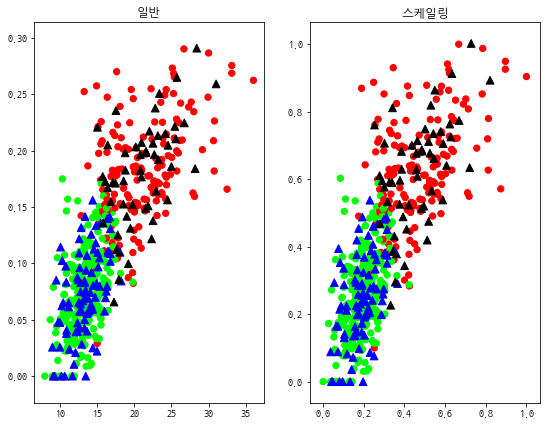

In [15]:
# 스케일링 안한 것 
plt.figure(figsize=(14,7))
colormap=np.array(['red','lime']) # 색상 배열
colormap2=np.array(['black','blue']) # 색상 배열

plt.subplot(1,3,1) # 일반
plt.scatter(X_train[:,20],X_train[:,27],c=colormap[y_train],s=40)
plt.scatter(X_test[:,20],X_test[:,27],c=colormap2[y_test],s=60,marker="^")
plt.title("일반")

plt.subplot(1,3,2) # 스케일링
plt.scatter(X_train_scale[:,20],X_train_scale[:,27],c=colormap[y_train],s=40)
plt.scatter(X_test_scale[:,20],X_test_scale[:,27],c=colormap2[y_test],s=60,marker="^")

plt.title("스케일링")

plt.show()

In [16]:
iris = datasets.load_iris()
X_train,X_test,y_train,y_test = train_test_split(iris.data, iris.target,random_state=0)

scaler = MinMaxScaler().fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)
svm = SVC(C=100).fit(X_train,y_train)
print("조정 후 검증용 세트의 정확도: {:.3f}".format(svm.score(X_test,y_test)))
svm = SVC(C=100).fit(X_train_scale,y_train)
print("조정 후 검증용 세트의 정확도: {:.3f}".format(svm.score(X_test_scale,y_test)))

조정 후 검증용 세트의 정확도: 0.974
조정 후 검증용 세트의 정확도: 0.974


In [20]:
kmeans = KMeans(n_clusters=3).fit(iris.data)
y=iris.target
predY = np.choose(kmeans.labels_, [1,0,2]).astype(np.int64)
print("군집 정확도 : {}".format(sm.accuracy_score(y,predY)))
print(sm.confusion_matrix(y,predY))
# print(kmeans)
# print(kmeans.labels_) # 클러스터링한 결과

군집 정확도 : 0.8933333333333333
[[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]


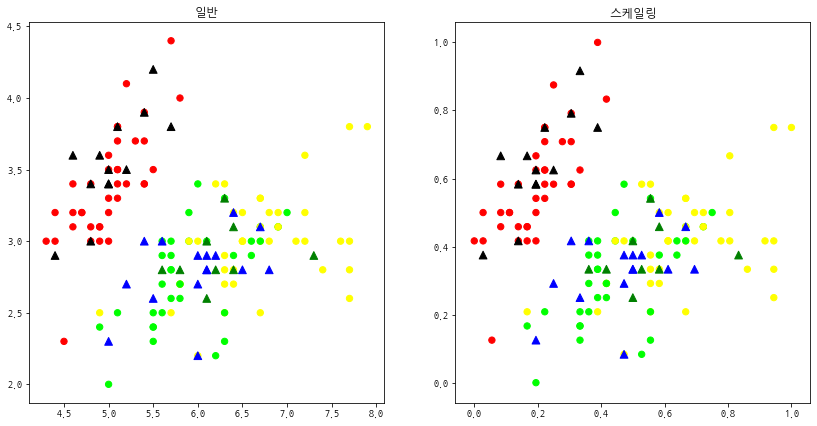

In [18]:

plt.figure(figsize=(14,7))
colormap=np.array(['red','lime','yellow']) # 색상 배열
colormap2=np.array(['black','blue','green']) # 색상 배열

plt.subplot(1,3,1) # 일반
plt.scatter(X_train[:,0],X_train[:,1], c=colormap[y_train], s=40)
plt.scatter(X_test[:,0],X_test[:,1],c=colormap2[y_test],s=60,marker="^")
plt.title("일반")

plt.subplot(1,3,2) # 스케일링
plt.scatter(X_train_scale[:,0],X_train_scale[:,1],c=colormap[y_train],s=40)
plt.scatter(X_test_scale[:,0],X_test_scale[:,1],c=colormap2[y_test],s=60,marker="^")
plt.title("스케일링")

plt.subplot(1,3,3) # 스케일링
plt.scatter(X_train_scale[:,0],X_train_scale[:,1],c=colormap[y_train],s=40)
plt.scatter(X_test_scale[:,0],X_test_scale[:,1],c=colormap2[y_test],s=60,marker="^")

plt.show()

### 차원축소, 특성추출

* PCA : 주성분분석 Princpal Component Analysis
* NMF : 비음수행렬분해 None-negative Matrix Factorization
* t_SNE : 고차원의 데이터셋을 2차원 산점도를 이용해서 시각화용도로 많이 사용 t-Distributed Stocastic Neighbor Embeding

##### 1. 주성분 분석(PCA)

* 주성분 분석은 특성들이 통계적으로 상관관계가 없도록 데이터세세을 회전시키는 기법
* 분포된 데이터셋에서 주성분을 찾는 알고리즘이다. 
* 데이터셋의 데이터들을 하나하나에 대한 성분을 분석하는 것이 아니라 여러 데에터들이 모여 하나의 분포를 이룰 때 이 `분포의 주성분`을 분석해주는 방법이다.


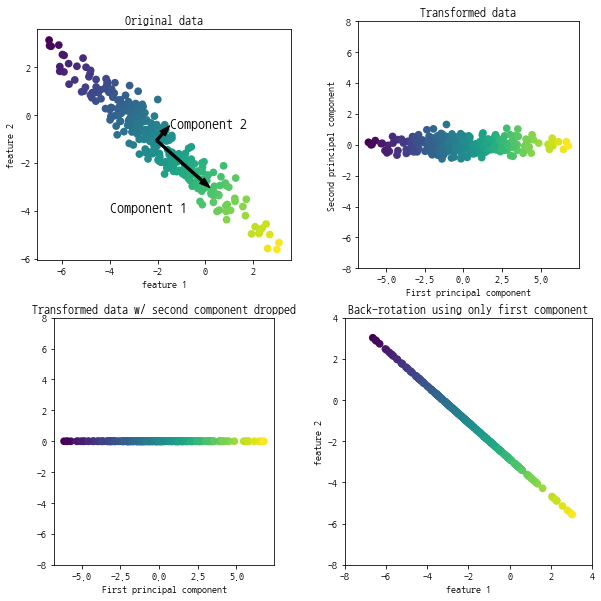

In [22]:
# 주성분 분석을 위한 인위적인 데이터셋의 시각화
mglearn.plots.plot_pca_illustration()

##### 결과분석

첫번째 그래프는 원본데이터셋의 데이터 포인트를 색으로 구분한 그래프. 이 알고리즘은 `성분1 Component 1`의 분산이 가장 큰 방향을 찾는다. 이 방향(벡터)이 예제 데이터셋에서 가장 많은 정보를 담고있는 방향이다. 다른 말로 `특성들의 상관관계가 가장 큰 방향`이다.

그 다음으로 첫번째 방향과 `직각방향 중에서 가장 많은 정보를 담은 방향`을 검색한다. 2차원에서는 직각 방향이 하나 이지만 고차원에서는 직각방향이 무수히 많은 방향이 있을 수 있다.

이 두 성분들을 화살표로 나타냈지만 사실 화살표의 머리와 꼬리는 아무런 의미가 없다. 즉, 화살표를 종앙에서 오른쪽 아래가 아니라 왼쪽 위로 그릴 수 있다. 이런 과정을 거쳐 찾은 방향을 데이터에 있는 `주된 분산의 방향이라고 해서 주성분`이라고 한다. 일반적으로 원본의 특성의 갯수 만큼 주성분이 있다.

두번째(우상) 그래프는 같은 데이터이지만 주성분1과 2를 각각 X축, Y 축에 나란히 회적한 것이다. 회전하기 전에 데이터에서 평균을 빼서 중심을 원점에 위치시켰다. PCA에 의해 회전된 축은 연관되어 있지 않으므로 변환된 데이터의`상관관계행렬 correlation matrix`이 대각선 방향을 제외하고는 0이 된다.

PCA는 주성분의 일부만 남기고 `차원축소용`으로도 사용할 수 있다. 세번째 그래프(좌하)는 첫번째 주성분만 유지하려고 한다. 이렇게 하면 2차원에서 1차원으로 차원이 축소가 된다.

마지막으로 데이터에 평균을 더해서 반대로 회전. 네번째 그래프(우하)의 데이터포인트들은 원래의 특성곤가에 놓여져 있지만 첫번째 주성분의 정보만 담고 있다. 이 변환은 데이터에서 노이즈를 제거하거나 주성분에서 유지되는 정보를 시각화 하는데 종종 사용된다.

##### 실습1. 시각화를 위해 유방암데이터셋에 PCA 적용하기

PCA에서 가장 널리 사용되는 분야는 고차원 데이터셋 시각화이다.특성간의 상관관계를 시각화 하기 위해 산점도행렬을 그리는 경우가 있는데 유방암 데이터세세은 특히 30개나 가지고 있어 산점도행렬을 그리기가 어렵다. 이보다 쉬운 방법은 악성과 양성 두 클래스에 대한 각 특성의 히스토그램을 그리는 것이다.

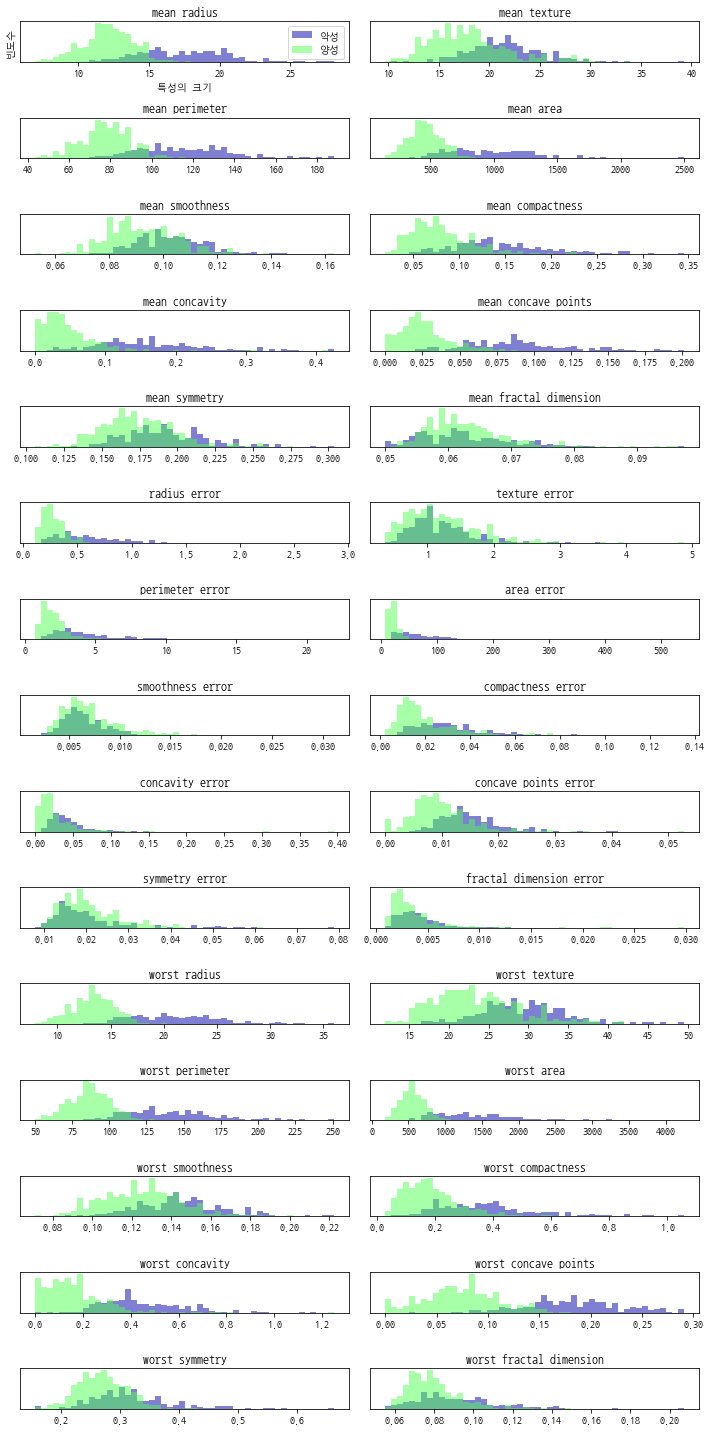

In [55]:
fig, axes = plt.subplots(15, 2, figsize=(10,20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()
for i in range(30):
    _, bins = np.histogram(cancer.data[:,i],bins=50)
    ax[i].hist(malignant[:,i], bins=bins, color=mglearn.cm3(0), alpha=0.5)
    ax[i].hist(benign[:,i],bins=bins,color=mglearn.cm3(2),alpha=0.5)
    ax[i].set_title("{}".format(cancer.feature_names[i]))
    ax[i].set_yticks(())

ax[0].set_xlabel("특성의 크기")
ax[0].set_ylabel("빈도수")
ax[0].legend(["악성","양성"],loc="best")
fig.tight_layout()
plt.show()

# 결과분석
# 각 특성들이 클래스별로 어떻게 분포가 되어있는지 를 알려주고 이를 통해 어떤 특성이 양성과 악성 샘프을
# 구분하는데 유용한지를 추측해 볼 수 있다.
# ex> symmetry error같은 경우는 2개가 뒤죽박죽 섞여있기 때문에 구분이 어려움, 연관성 낮음
# worst compactness 같은 경우는 어느정도 달라 주성분으로 사용 가능 
# 하지만 이 해당 그래프는 특성간의 상호작용이나 이 상호작용의 클래스와 어떤 관련이 있는지는 전혀 알수가
# 없다. PCA를 사용하면 각 특성들의 주요 상호작용을 찾아 낼 수가 있다.


#### 유방암 데이터셋을 PCA로 분석하기

In [58]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [95]:
cancer =load_breast_cancer()
scaler = StandardScaler().fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

# 데이터의 두개의 주성분만 (mean radius, mean texture)설정
# 유방암 데이터셋을 PCA로 기계학습
# n_components 는 2개의 요소만 추출 
pca = PCA(n_components=2).fit(X_scaled)

# 처음 두개의 주성분을 사용해서 데이터를 변환
X_pca =pca.transform(X_scaled)

# 원본데이터크기 vs PCA로 변환된 데이터의 크기
print("원본데이터셋의 형태:{}".format(str(X_scaled.shape)))
print("원본데이터셋의 형태:{}".format(str(X_pca.shape)))

원본데이터셋의 형태:(569, 30)
원본데이터셋의 형태:(569, 2)


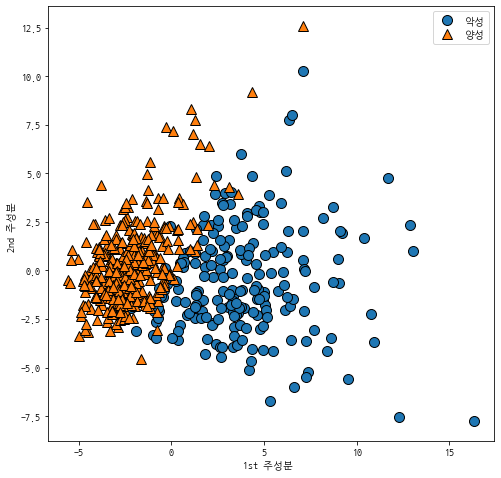

In [96]:
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0],X_pca[:,1],cancer.target)
plt.xlabel("1st 주성분 ")
plt.ylabel("2nd 주성분 ")
plt.legend(["악성","양성"],loc="best")
fig.tight_layout()
plt.show()

# 결과분석
# PCA는 비지도학습이기 때문에 최전축을 찾을 때 어떤 클래스의 정보도 사용하지 않는다. 단순히 데이터에 있는
# 상관관계만 고려한다. 그래서 악성잉 양성보다 더 넓게 분포하고 있다. 하지만 그래프를 통해서 두축을 해석하기가
# 쉽지 않다는 단점이 있다.
# PCA가 학습될 때 components_ 속성에 저장된다.

In [97]:
# 주성분의 형태와 주성분의 결과괎
print("PCA 주성분의 형태:{}".format(pca.components_.shape))
print("PCA 주성분:{}".format(pca.components_))

PCA 주성분의 형태:(2, 30)
PCA 주성분:[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


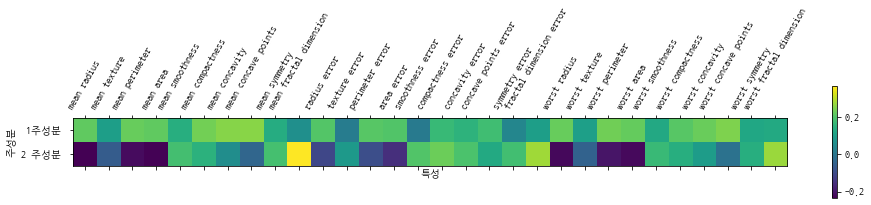

In [98]:
# 주성분과 상관관계를 hitmap으로 시각화
plt.matshow(pca.components_, cmap="viridis")
plt.yticks([0,1],["1주성분 ","2 주성분 "])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),cancer.feature_names, rotation=60)
plt.xlabel("특성")
plt.ylabel("주성분")
plt.show()

# 결과분석
# 첫번째 주성분의 모든 특성은 부호가 같다.(모두 양수이지만 화살표 방향은 의미가 없다.) 이 말은
# 모든 특성사이에 공통의 상호관계가 있다. 따라서 한 특성의 값이 커지면 다른 특성값도 커진다.
# 두번째 주성분은 부호가 섞여있다. 두 주성분 모두 300개의 특성이 있고 모든 특성이 섞여 있기 때문에 
# 그래프의 축이 가지는 의미를 설명하기 쉽지 않다.

##### 실습 2. 고유얼굴 특성 추출

`PCA`는 특성추출에도 이용한다. 특성추출은 원본 데이터표현보다 분석하기에 더 적합한 표현을 찾을 수 있다라는 생각에서 출발한다. 이미지를 다루는 애플리케이션은 특성추출에 도움이 되는 예제이다. 이미지는 RGB강도가 기록된 픽셀로 구성된다.

PCA를 이용하여 `LFW Labeled Faces in the Wild`데이터셋의 얼굴이미지에수 특성을 추출하고 NMF와 K-means의 결과를 비교해 보자 이 이미지는 유명인사의 얼굴이미지들로 정치가, 가수, 배우, 운동선수등 62명의 얼굴이미지로 3023개의 이미지를 제공. 이미지의 사이지는 87x65픽셀이다."
   

In [100]:
from sklearn.datasets import fetch_lfw_people

(3023, 87, 65)


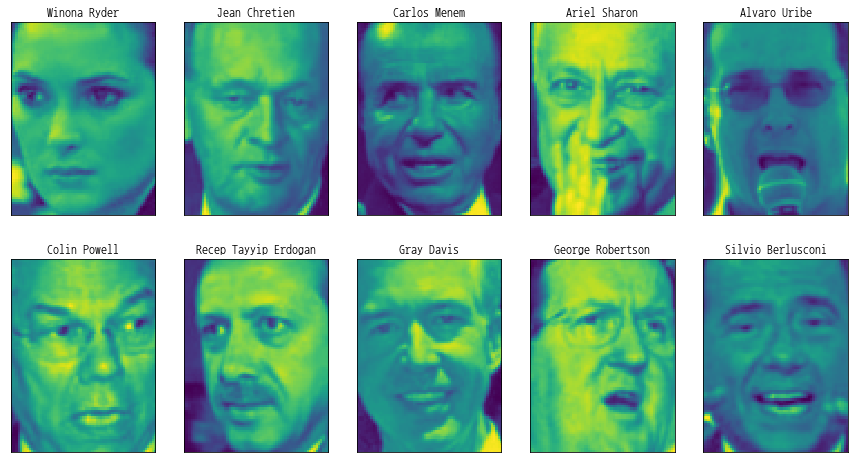

In [101]:
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
print(people.images.shape)

# 샘플이미지시각화
fig, axes = plt.subplots(2, 5, figsize=(15,8), subplot_kw={'xticks':(), 'yticks':()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [102]:
# 데이터의 편중을 없애기 위해 사람당 50개의 이미지만 선택\n",
# 이렇게 하지 않으면 부시의 사진만 제일 많이 나올 가능성이 있다.\n",
mask = np.zeros(people.target.shape, dtype=np.bool)
print(mask)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
print(mask)

X_people = people.data[mask]
y_people = people.target[mask]

# 0~255사이의 흑백이미지의 픽셀 값을 0~1사이의 값으로 스케일조정\n",
# MinMaxScaler을 적용하는 것과 거의 동일한 결과이다.\n",
X_people = X_people / 255.0 # 컬러이미지를 흑백이미지로 변환

[False False False ... False False False]
[ True  True  True ... False False False]


In [104]:
# 얼굴인식이라 하면 통상적으로 새로운 이미지가 데이터베이스에 잇는 이미지와 일치여부 작업
# 가장 간단한 방법으로 KNN알고리즘을 사용
from sklearn.neighbors import KNeighborsClassifier

X_train,X_test,y_train,y_test = train_test_split(X_people,y_people,stratify=y_people,random_state=0)

# 이웃의 갯수를 1개로 설정
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train)
print("최근접 이웃의 갯수를 1로 설정한 검증데이터셋의 정확도: {:.3f}".format(knn.score(X_test,y_test)))

# 결과분석
# 정확도가 23%로 많이 떨어진다. 이를 해결하기 위해서 PCA를 적용

최근접 이웃의 갯수를 1로 설정한 검증데이터셋의 정확도: 0.219


In [106]:
# PCA로 학습후에 100개의 주성분을 추출한 후에 훈련, 검증용 셋을 변환
# whiten옵션은 주성분의 스케일이 같아지도록 조정하는 옵션
pca = PCA(n_components=100,whiten=True,random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca= pca.transform(X_test)

# 주성분으로 선택한 데이터셋의 크기
print("주성분을 선택한 데이터의 형태: {}".format(X_train_pca.shape))
print("주성분을 선택한 데이터의 형태: {}".format(X_test_pca.shape))

주성분을 선택한 데이터의 형태: (1547, 100)
주성분을 선택한 데이터의 형태: (516, 100)


In [113]:
knn = KNeighborsClassifier(n_neighbors=1).fit(X_train_pca,y_train)
print("최근접 이웃의 갯수를 1로 설정한 검증데이터셋(pca)의 정확도: {:.3f}".format(knn.score(X_test_pca,y_test)))

# 결과분석
# pca를 적용한 KNN과 적용하지 않은 KNN의 결과는 31%vs 23%로 향상되었기 때문에 주성분의 데이터가 
# 더 잘 예측한다고 할 수 있다. 하지만 예측율이 많이 낮기 때문에 여전히 머신러닝알고리즘으로는 이미지를 
# 분석하기에는 어려움이 많은 걸 알 수 있다.

최근접 이웃의 갯수를 1로 설정한 검증데이터셋(pca)의 정확도: 0.312


In [114]:
# 주성분의 데이터 형태
print('주성분의 데이터 형태 : {}'.format(pca.components_.shape))

주성분의 데이터 형태 : (100, 5655)


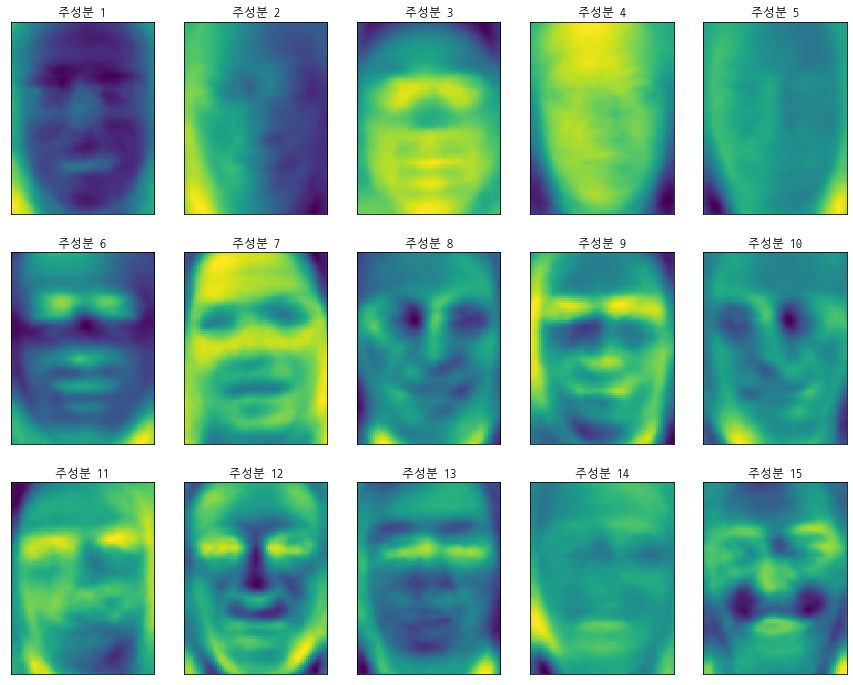

In [118]:
# 주성분으로 그리는 이미지의 시각화
fig,axes = plt.subplots(3,5,figsize=(15,12),subplot_kw={'xticks':(),"yticks":()})

for i, (component, ax)in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape),cmap='viridis')
    ax.set_title('주성분 {}'.format(i+1))


plt.show()

# 결과분석
# 주성분 1은 얼굴과 배경의 명암차이, 주성분 2는 오른쪽과 왼쪽의 조명의 차이가 있다.
# 이런 방식은 원본픽셀의 갯수를 사용하는 것보다 주성분의 갯수가 훨씬 적기 때문에 기계학습의 
# 성능면에서는 의미가 있지만 사람의 얼굴을 인식하는 방식과는 거리가 멀다.
# PCA모델은 픽셀을 기반으로 하므로 얼굴의 배치와 저명이 두 이미지가 얼마나 유사한지 판단하는데는 
# 큰 영향을 주지만 사람의 얼굴의 유사도를 판단할 때는 나이, 성별, 표정, 머리모양과 같이 픽셀의 
# 강도로 표현하기 어려운 속성들을 사용하기 때문에 PCA로 판단하는 이미지의 정확도는 떨어 질 수 있다.


________________________________________________________________________________
[Memory] Calling mglearn.plot_pca.pca_faces...
pca_faces(array([[0.535948, ..., 0.243137],
       ...,
       [0.043137, ..., 0.596078]], dtype=float32), 
array([[0.237908, ..., 0.269281],
       ...,
       [0.4     , ..., 0.254902]], dtype=float32))
________________________________________________________pca_faces - 1.6s, 0.0min


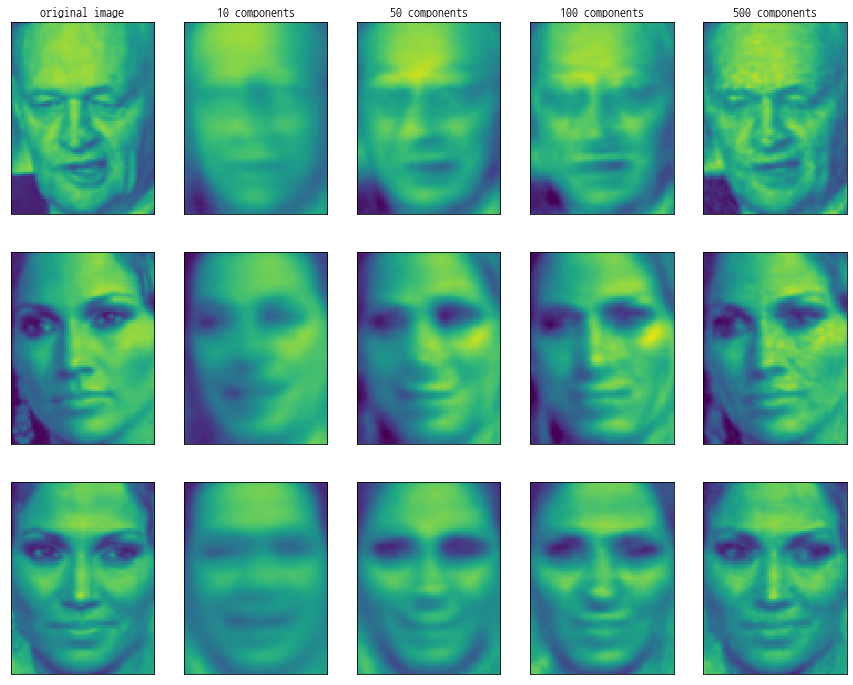

In [119]:
# 주성분 갯수에 따른 얼굴이미지의 재구성(시각화)
mglearn.plots.plot_pca_faces(X_train,X_test,image_shape)

#### 실습 3. 붓꽃 데이터의 차원축소(PCA) 

* iris 데이터에서 10개의 데이터 즉, 10개의 표본만 선택해서 꽃잎의 길이와 넓이데이터를 가지고 실습

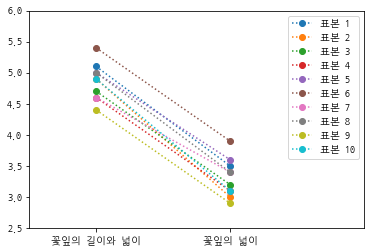

In [130]:
iris = datasets.load_iris()
N = 10
X = iris.data[:N, :2] # 10개의 표본, 꽃잎의 길이와 넓이

# 시각화
plt.plot(X.T,'o:')
plt.xticks(range(2),["꽃잎의 길이와 넓이","꽃잎의 넓이"])
plt.xlim(-0.5,2)
plt.ylim(2.5,6)
plt.legend(["표본 {}".format(i+1) for i in range(N)])
plt.title("붓꽃크기의 특성")
plt.show()

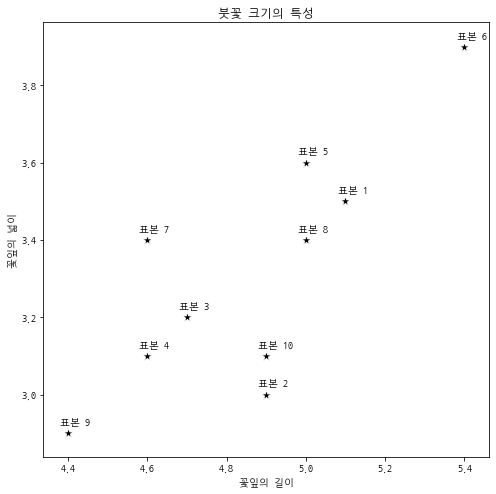

In [138]:
import seaborn as sns

plt.figure(figsize=(8,8))
ax = sns.scatterplot(0,1,data=pd.DataFrame(X), s=100,color='k',marker='*')

for i in range(N):
    ax.text(X[i,0]-0.02,X[i,1]+0.02,"표본 {}".format(i+1))

plt.xlabel("꽃잎의 길이")
plt.ylabel("꽃잎의 넓이")
plt.title("붓꽃 크기의 특성")
plt.show()

In [230]:
# 2 차원 데이터를 PCA를 적용해서 1차원으로 축소하기
pca = PCA(n_components=1)
X_low = pca.fit_transform(X) # 차원축소된 자료 

In [231]:
X_low

array([[ 0.30270263],
       [-0.1990931 ],
       [-0.18962889],
       [-0.33097106],
       [ 0.30743473],
       [ 0.79976625],
       [-0.11185966],
       [ 0.16136046],
       [-0.61365539],
       [-0.12605597]])

In [140]:
X2 = pca.inverse_transform(X_low) # PCA가 적용된 원본(유사한) 데이터셋

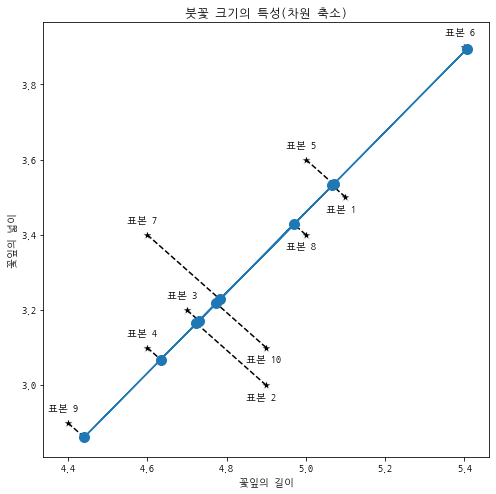

In [147]:
# 차원 축소돈 데이터셋으로 그리는 그래프 
plt.figure(figsize=(8,8))
ax = sns.scatterplot(0,1,data=pd.DataFrame(X),s=100,color='k',marker='*')
for i in range(N):
    d=0.03 if X[i,1]>X2[i,1] else -0.04
    ax.text(X[i,0]-0.05,X[i,1]+d,"표본 {}".format(i+1))
    plt.plot([X[i,0],X2[i,0]],[X[i,1],X2[i,1]],'k--')
    
plt.plot(X2[:,0],X2[:,1],"o-",markersize=10)
plt.xlabel("꽃잎의 길이")
plt.ylabel("꽃잎의 넓이")
plt.title("붓꽃 크기의 특성(차원 축소)")
plt.show()

In [148]:
# 가장 근사값을 갖는 데이터의 포인트
pca.components_

array([[0.68305029, 0.73037134]])

#### 실습 4. 주식 가격의 예측(PCA)

PCA는 다양한 분야에서 사용된다. 그 중에 금융분야에서 어떻게 쓰이는 지를 실습하는 것으로 미국, 일본,유럽 한국의 과거 20년간의 주가를 PCA알고리즘을 적용해보는 실습이다. 

In [164]:
# 과거 주가자료 가져오기 
import pandas_datareader.data as web
import datetime

pd.core.common.is_list_like = pd.api.types.is_list_like

symbols=[
   "SPASTT01USM661N",
    "SPASTT01JPM661N",
    "SPASTT01EZM661N",
    "SPASTT01KRM661N" 
]

data = pd.DataFrame()
for sym in symbols:
    data[sym] = web.DataReader(sym,data_source='fred',
                              start=datetime.datetime(1998,1,1),end=datetime.datetime(2017,3,31))[sym]
data.columns = ["US","JP","EZ","KR"]
data.head()

,US,JP,EZ,KR
DATE,,,,
1998-01-01,49.924498,78.110659,65.784650,23.629733
1998-02-01,52.699643,81.830767,70.732175,26.113828
1998-03-01,55.526196,81.520059,77.635309,26.004440
1998-04-01,57.244881,78.773329,83.265497,22.087366
1998-05-01,56.889428,78.267946,85.029071,17.716830


In [165]:
data =data/data.iloc[0]*100 # 100을 기준으로 놓기 데이터 처리
data.tail()

,US,JP,EZ,KR
DATE,,,,
2016-11-01,200.010468,116.307263,138.488264,416.999832
2016-12-01,208.001394,125.740883,146.306088,425.443986
2017-01-01,210.364754,126.582655,150.386752,434.247959
2017-02-01,214.272422,126.892955,150.725136,438.260668
2017-03-01,215.921971,128.139107,156.032603,449.086777


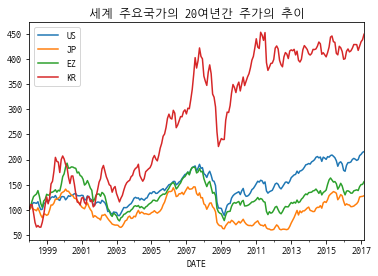

In [166]:
# 주요국가의 20년간 주가의 추이 (시각화)
data.plot()
plt.title("세계 주요국가의 20여년간 주가의 추이")
plt.show()

In [232]:
# 연간 수익율 데이터 구하기 
data.pct_change()
df=((data.pct_change()+1).resample("A").prod()-1).T*100
df.head()

DATE,1998-12-31,1999-12-31,2000-12-31,2001-12-31,2002-12-31,2003-12-31,2004-12-31,2005-12-31,2006-12-31,2007-12-31,2008-12-31,2009-12-31,2010-12-31,2011-12-31,2012-12-31,2013-12-31,2014-12-31,2015-12-31,2016-12-31,2017-12-31
US,14.249290,10.800392,1.094171,-9.638213,-17.680773,23.135271,14.233654,9.135500,16.669812,7.947193,-43.692676,29.820439,9.341795,-5.543249,13.010846,21.299603,6.609915,-5.743802,8.675742,3.807944
JP,-8.567915,47.802619,-18.365577,-23.827406,-16.923968,19.628102,9.945947,44.912009,2.113724,-8.489431,-44.929412,7.746080,0.138706,-18.221219,11.344079,54.198614,12.293250,9.842221,-1.725372,1.907275
EZ,21.308040,36.872314,1.375330,-21.857080,-30.647772,12.066127,10.551998,22.994959,19.584584,6.402134,-47.160666,23.384884,2.326218,-19.630755,16.944233,17.464330,4.923494,8.023078,-0.905205,6.648059
KR,10.411582,87.623876,-46.975114,27.644005,4.448180,15.121124,9.091136,53.381919,5.953828,33.925391,-41.341064,47.839880,21.509189,-7.137548,6.162135,0.695260,-2.462336,1.594040,2.533571,5.557204


In [223]:
(data.pct_change()+1).resample("A").prod()

,US,JP,EZ,KR
DATE,,,,
1998-12-31,1.142493,0.914321,1.213080,1.104116
1999-12-31,1.108004,1.478026,1.368723,1.876239
2000-12-31,1.010942,0.816344,1.013753,0.530249
2001-12-31,0.903618,0.761726,0.781429,1.276440
2002-12-31,0.823192,0.830760,0.693522,1.044482
2003-12-31,1.231353,1.196281,1.120661,1.151211
2004-12-31,1.142337,1.099459,1.105520,1.090911
2005-12-31,1.091355,1.449120,1.229950,1.533819
2006-12-31,1.166698,1.021137,1.195846,1.059538


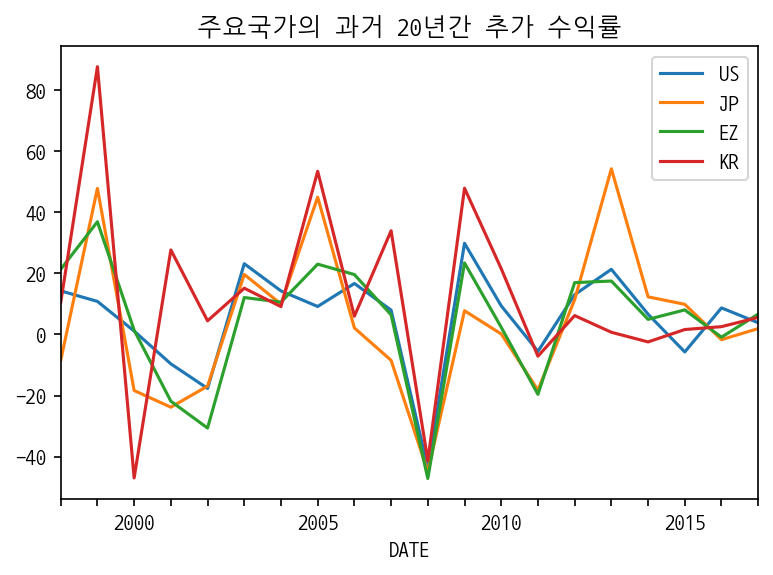

In [233]:
# 연간수익률 시각화
plt.rcParams['figure.dpi']=150
df.T.plot()
plt.title("주요국가의 과거 20년간 추가 수익률")
plt.xticks(df.columns)
plt.xticks(df.columns)
plt.show()

In [237]:
# PCA분석을 통해 주요 국가의 주가움직임에 따른 경기변동을 살펴보기
pca=PCA(n_components=1) # 주요 요소 1개
w = pca.fit_transform(df) #
print(w)
# 세계주가의 공토요인 즉 평균값을 구하기 
m=pca.mean_
print(m) # 20년각 각 나라의 평균

# 나라별로 주가를 다르게 하는 요인은 주성분으로 그할 수 있다.
p1= pca.components_[0]  
print(p1)

[[-33.2606513 ]
 [-21.2106072 ]
 [-26.68270295]
 [ 81.15396144]]
[  9.35024903  45.7748003  -15.71779759  -6.91967355 -15.20108361
  17.48765584  10.95568389  32.60609686  11.08048721   9.94632162
 -44.28095456  27.19782058   8.32897696 -12.63319273  11.86532327
  23.41445161   5.34108071   3.42888451   2.14468408   4.48012048]
[-0.00178731  0.53692919 -0.39481876  0.41253165  0.24009173 -0.03169561
 -0.02576823  0.27807737 -0.07213331  0.28213967  0.034968    0.23743568
  0.15471149  0.05821223 -0.07063403 -0.25610717 -0.09168617 -0.01156885
 -0.00250754  0.01202741]


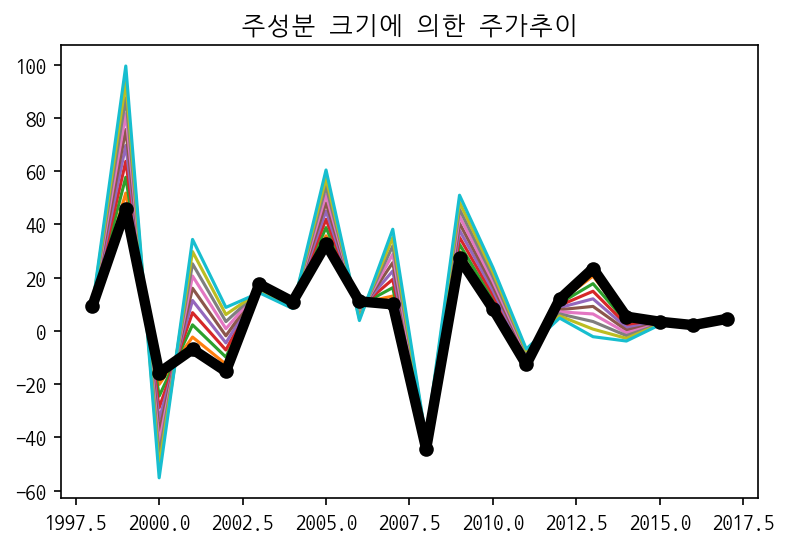

In [206]:
# 주성분 크기에 따른 주가 변동(시각화)
for i in np.linspace(0,100,10):
    plt.plot(range(1998,2018),pca.mean_+p1*i)
plt.plot(range(1998,2018),pca.mean_,"ko-",linewidth=5)
plt.title("주성분 크기에 의한 주가추이")
plt.show()

# 결과분석
# 평균주가로부터 주성분(p1)이 더해질 수록 주가의 형태가 변동되는 추이를 볼 수가 있다.
# 굵은 건은 평균주가이고 나머지 주가는 주성분이 점점 많이 추가된에 따라 주가의 변동을 표시한 것이다.

array([  0.        ,   5.26315789,  10.52631579,  15.78947368,
        21.05263158,  26.31578947,  31.57894737,  36.84210526,
        42.10526316,  47.36842105,  52.63157895,  57.89473684,
        63.15789474,  68.42105263,  73.68421053,  78.94736842,
        84.21052632,  89.47368421,  94.73684211, 100.        ])

#### 실습 5 . 올리베티 얼굴데이터(PCA)

올리베티 얼굴 데이터로 PCA분석하기, 올리베티 얼굴 사진중 특정 인물의 사진 10장을 데이터로 사용

In [207]:
from sklearn.datasets import fetch_olivetti_faces

faces_all = fetch_olivetti_faces()

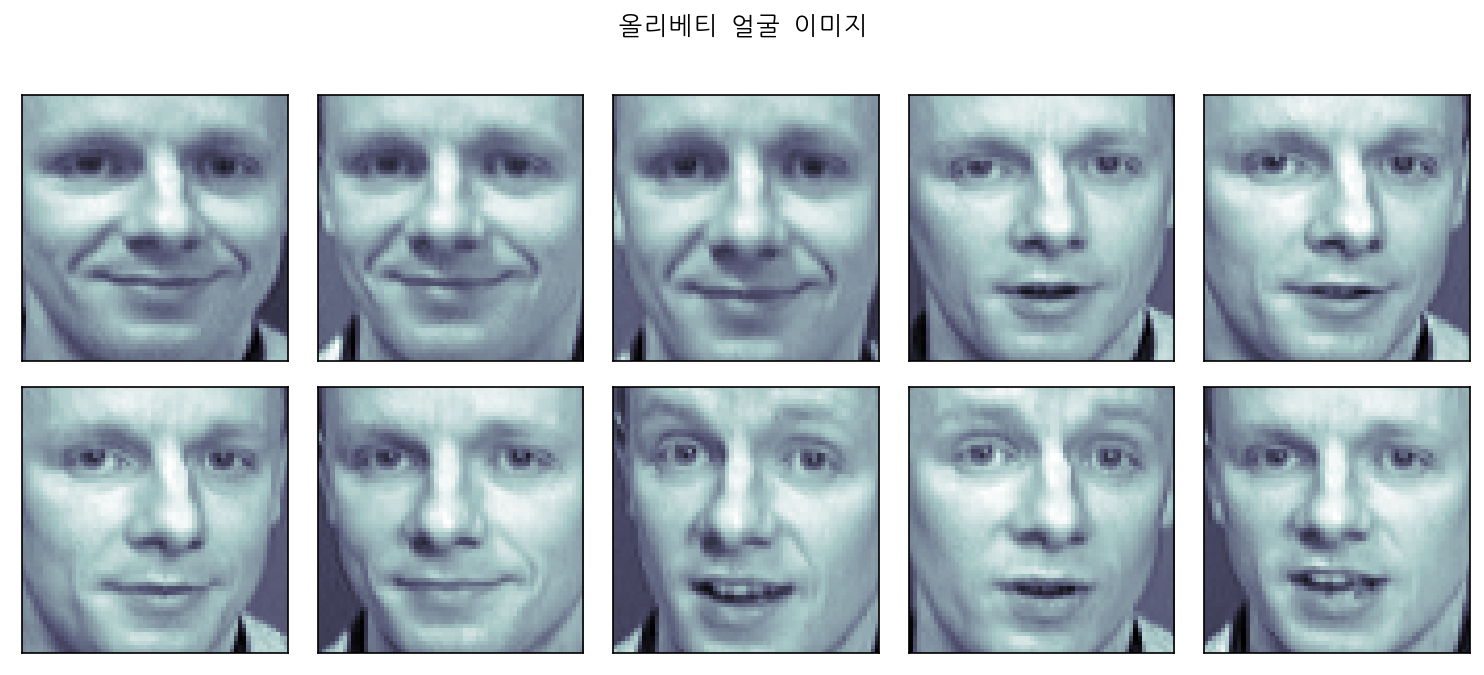

In [238]:
k = 20 
faces = faces_all.images[faces_all.target==20] # 사진 아이디가 20번인 얼굴이미지

N = 2
M = 5

fig = plt.figure(figsize=(10,5))
plt.subplots_adjust(top=1,bottom=0,hspace=0,wspace=0.05)
for i in range(N):
    for j in range(M):
        k=i*M+j
        ax = fig.add_subplot(N,M,k+1)
        ax.imshow(faces[k],cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])

plt.suptitle("올리베티 얼굴 이미지")
plt.tight_layout()
plt.show()

In [246]:
# 주성분이 2개인 PCA분석 실행하기
pca = PCA(n_components=2)
X =faces_all.data[faces_all.target==k]
W = pca.fit_transform(X) # 가중치를 준 값
X2 = pca.inverse_transform(W) # 다시 되돌려줌

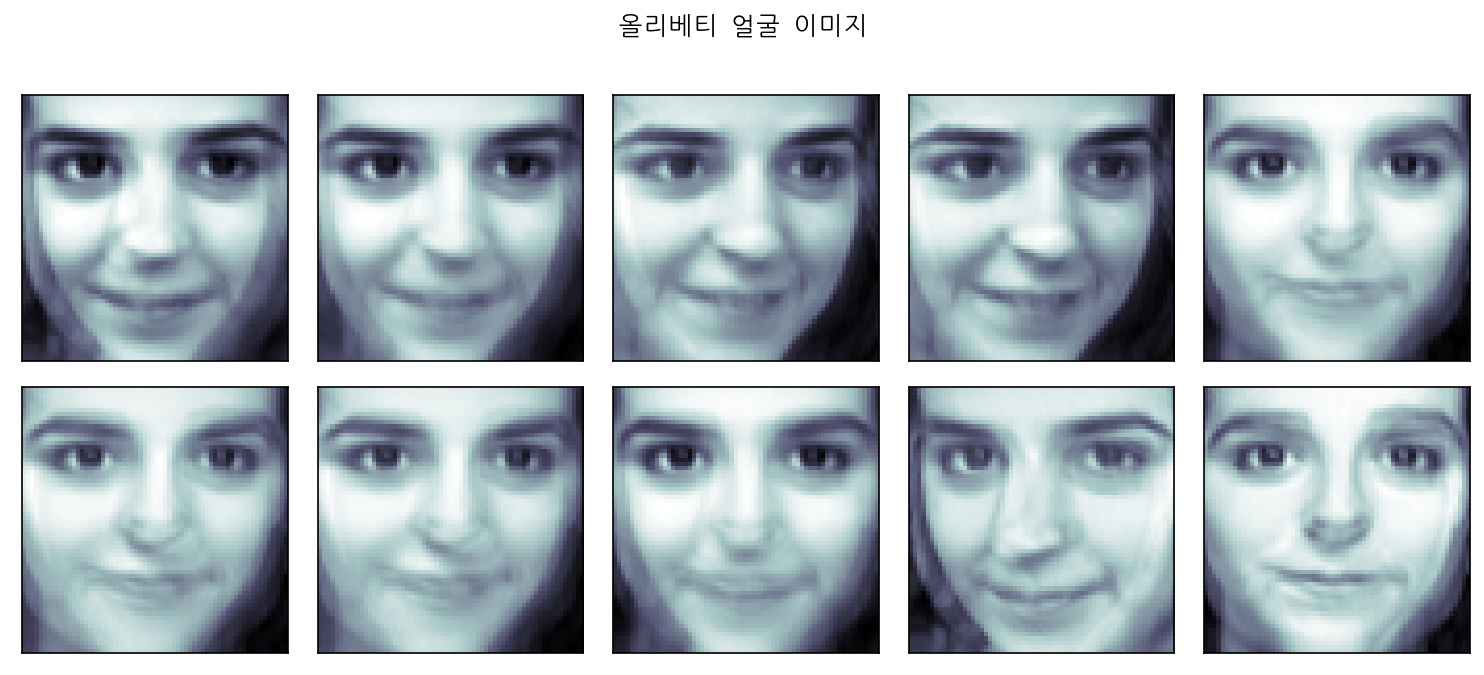

In [248]:
# 주 성분 분석으로 근사치를 구한 이미지의 시각화
N = 2
M = 5

fig = plt.figure(figsize=(10,5))
plt.subplots_adjust(top=1,bottom=0,hspace=0,wspace=0.05)
for i in range(N):
    for j in range(M):
        k=i*M+j
        ax = fig.add_subplot(N,M,k+1)
        ax.imshow(X2[k].reshape(64,64),cmap=plt.cm.bone) 
        # 2차원인 데이터가 1차원이 되었기 때문에 reshape(64,64)로 다시 픽셀을 만듬
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])

plt.suptitle("주 성분 분석으로 근사화한 올리베티 얼굴 이미지")
plt.tight_layout()
plt.show()

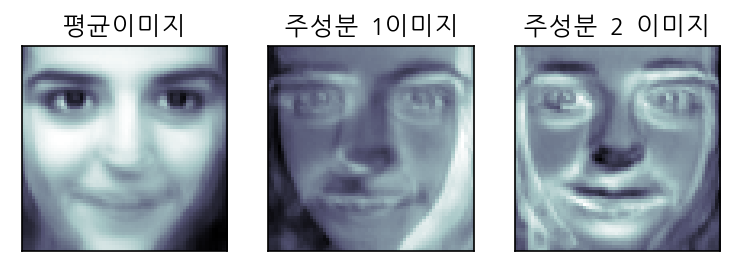

In [255]:
# 20번 얼굴이미지들을 평균 값과 2개의 주성분으로 이미지 시각화하기
face_mean = pca.mean_.reshape(64,64)

plt.subplot(131)
plt.imshow(face_mean,cmap=plt.cm.bone)
plt.grid(False)
plt.xticks(())
plt.yticks(())
plt.title("평균이미지")

face_p1 = pca.components_[0].reshape(64,64) # 첫번째 주성분을 가져와서 나온 이미지
plt.subplot(132)
plt.imshow(face_p1,cmap=plt.cm.bone)
plt.grid(False)
plt.xticks(())
plt.yticks(())
plt.title("주성분 1이미지")

face_p2 = pca.components_[1].reshape(64,64) # 두번째 주성분을 가져와서 나온 이미지
plt.subplot(133)
plt.imshow(face_p2,cmap=plt.cm.bone)                         
plt.grid(False)
plt.xticks(())
plt.yticks(())                          
plt.title("주성분 2 이미지")                   
plt.show()

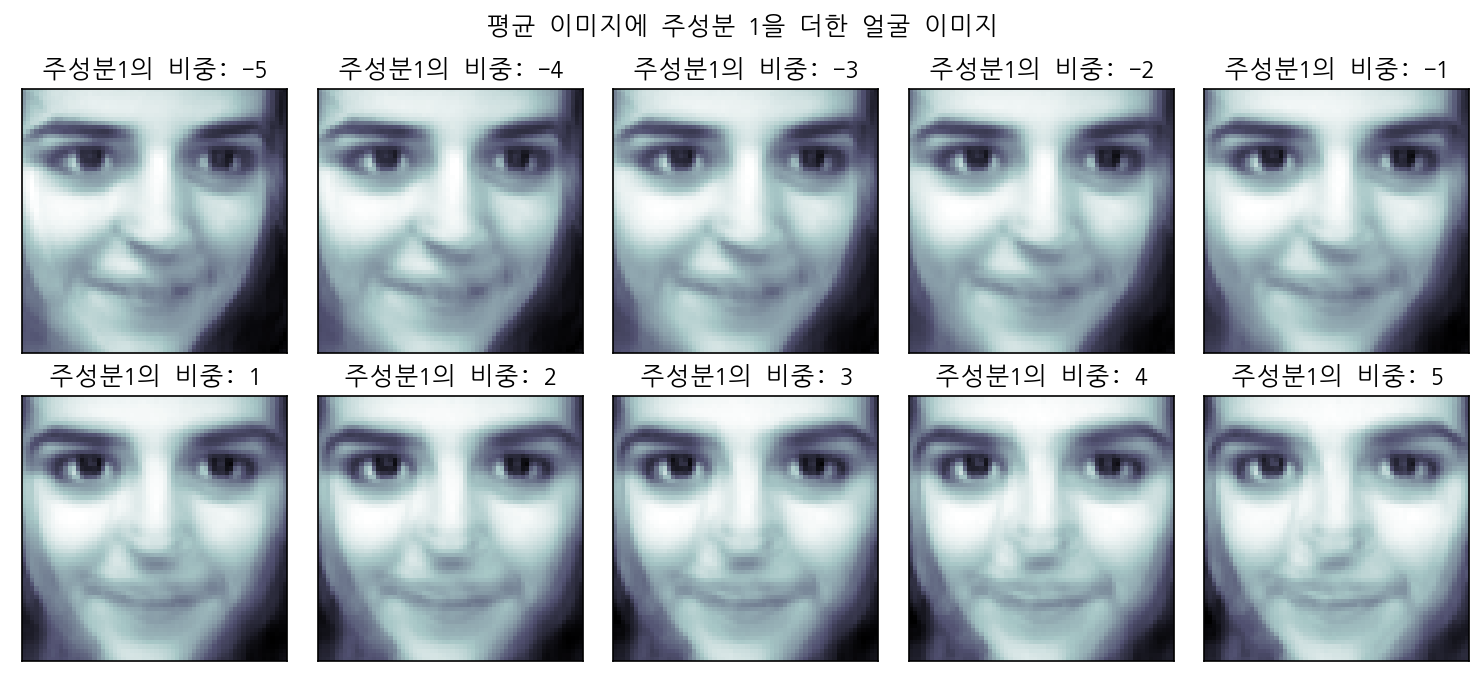

In [257]:
# 상기 이미지만으로는 주성분이 각각 어떤 의미를 갖는지 알기 어렵기 때문에
# 평균이미지에 주성분 이미지를 더한(가중치) 이미지를 시각화하기
N = 2
M = 5

fig = plt.figure(figsize=(10,5))
plt.subplots_adjust(top=1,bottom=0,hspace=0,wspace=0.05)
for i in range(N):
    for j in range(M):
        k=i*M+j
        ax = fig.add_subplot(N,M,k+1)
        
        weight = k-5 if k <5 else k-4
        
        ax.imshow(face_mean+weight*face_p1,cmap=plt.cm.bone) 
        # 평균 face_mean의 얼굴이미지에 face_p1의 얼굴 이미지를 엎어친다고 볼수 있다.
        # 조금씩 움직인것
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title("주성분1의 비중: {}".format(weight))

plt.suptitle("평균 이미지에 주성분 1을 더한 얼굴 이미지")
plt.tight_layout()
plt.show()

# 결과 분석
# 평균이미지에 주성분 1에 가중치를 주어서 그린 이미지는 첫번째 주성분은 왼쪽과 오른쪽에서 바라본
# 이미지의 차이를 미세하게 나타낸 것을 볼 수가 있다.

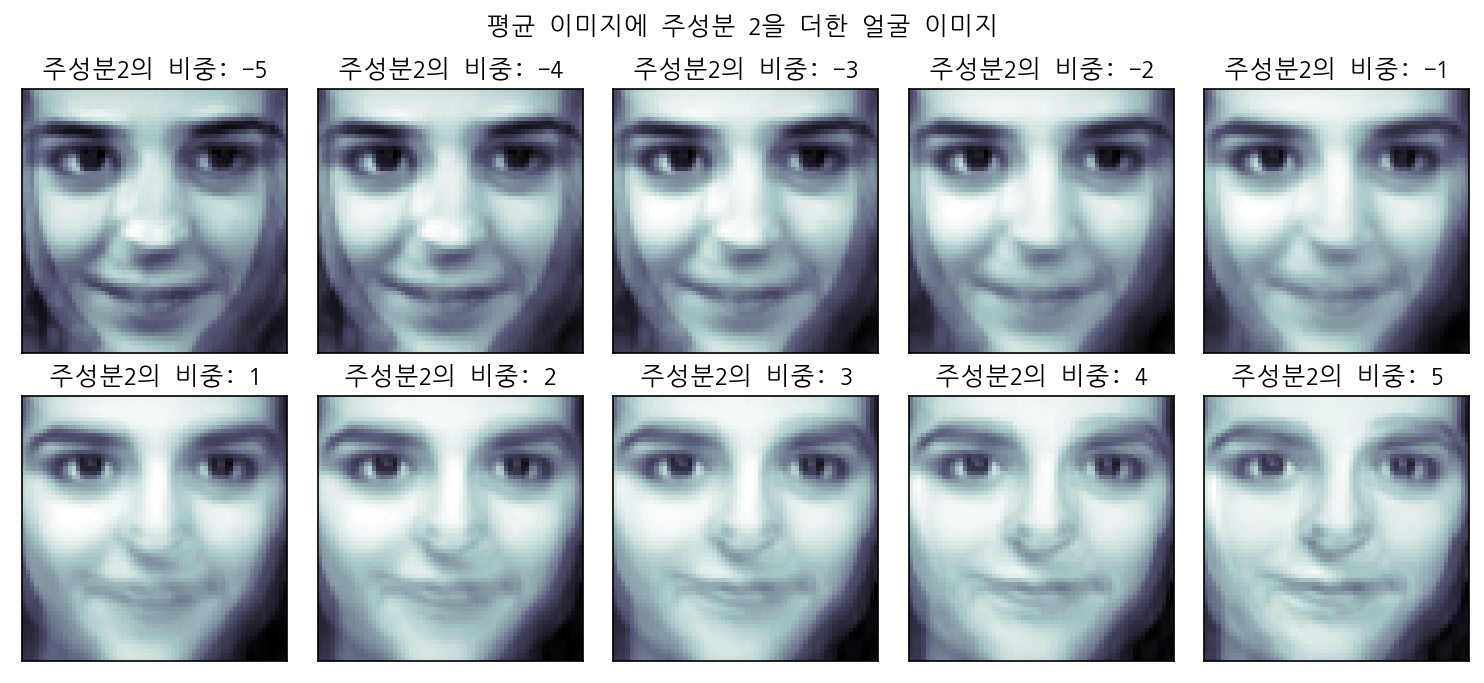

In [260]:
# 평균이미지에 주성분 2 이미지를 더한(가중치) 이미지를 시각화하기
N = 2
M = 5

fig = plt.figure(figsize=(10,5))
plt.subplots_adjust(top=1,bottom=0,hspace=0,wspace=0.05)
for i in range(N):
    for j in range(M):
        k=i*M+j
        ax = fig.add_subplot(N,M,k+1)
        
        weight = k-5 if k <5 else k-4
        
        ax.imshow(face_mean+weight*face_p2,cmap=plt.cm.bone) 
        # 평균 face_mean의 얼굴이미지에 face_p2의 얼굴 이미지를 엎어친다고 볼수 있다.
        # 조금씩 움직인것
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title("주성분2의 비중: {}".format(weight))

plt.suptitle("평균 이미지에 주성분 2을 더한 얼굴 이미지")
plt.tight_layout()
plt.show()

#### 연습문제

iris, cancer, olevetti 데이터셋을 PCA 적용후 데이터셋으로 머신러닝 KMeans(시간나면 KNN,SVM등)를 사용하여 예측율을 구해보시오 

In [265]:
## iris PCA후 Kmean 예측율
iris = datasets.load_iris()
pca = PCA(n_components=2).fit(iris.data)
X_pca_iris=pca.transform(iris.data)
print(iris.data.shape)
print(X_pca_iris.shape)


In [ ]:
kmeans = KMeans(n_clusters=3,random_state=0).fit(X_pca_iris)
y_pred = kmeans.predict(X_pca_iris)
predY = np.choose(kmeans.labels_, [0,1,2]).astype(np.int64)
print("군집 정확도 : {}".format(sm.accuracy_score(iris.target,predY)))
print(sm.confusion_matrix(iris.target,predY) )

In [ ]:
## cancer PCA후 Kmean 예측율

cancer = datasets.load_breast_cancer()
pca = PCA(n_components=2).fit(cancer.data)
X_pca_cancer=pca.transform(cancer.data)
print(cancer.data.shape)
print(X_pca_cancer.shape)

In [ ]:
kmeans = KMeans(n_clusters=2,random_state=0).fit(X_pca_cancer)
y_pred = kmeans.predict(X_pca_cancer)
predY = np.choose(kmeans.labels_, [0,1]).astype(np.int64)
print("군집 정확도 : {}".format(sm.accuracy_score(cancer.target,predY)))
print(sm.confusion_matrix(cancer.target,predY) )

#### B. 비음수행렬분해(NMF)

`NNF(Non-negative Matrix Factorization)`는 유용한 특성을 뽑아내기 위한 또 다른 `비지도학습 알고리즘`이다. NMF는 PCA와 비슷하고 차원축소에도 사용할 수 있다. PCA처럼 어떤 성분의 가중치 합으로 각 데이터 포인트를 나타낼 수 있다. 하지만 PCA는 데이터의 분산이 가장크고 수직인 성분을 찾았다면 `NMF에서는 음수가 아닌 성분과 계수값`을 찾는다.  즉 `주성분과 계수가 모두 0보다 크거나 같아야 한다.`
음수가 아닌 주성분과 계수의 가중치 합은 음수가 되지 않으므로 당연하게 이 방식은 음수가 아닌 특성을 가진 데이터에만 적용할 수 있다.

음수가 아닌 가중치 합으로 데이터를 분해하는 기능은 여러 사람의 목소리가 담긴 오디오 트랙이나 여러 악기로 이뤄진 음악처럼 독립된 소스를 추가(덮어써서)하여 만들어진 데이터에 특히 유용하다. 이럴때 NMF는 섞여 있는 데이터에서 원본성분을 구분할 수 있다.

##### 1. 인위적 데이터에 NMF 적용하기

PCA와는 달리 NMF로 데이터를 다루려면 주어진 데이터가 양수인지 확인해야 한다. 이 말은 데이터가 원점(0,0)에서 상대적으로 어디에 놓여 있는지가 NMF에서는 중요하다는 뜻이다.

In [ ]:
# NMF로 찾은 성분이 2개일 때(완쪽), 1개일 때(오른쪽)
mglearn.plots.plot_nmf_illustration()

In [ ]:
# NMF성분 갯수에 따른 얼굴이미지의 재구성
mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

In [ ]:
# 성분 15개만 추출, NMF의 핵심매개변수는 추출할 성분의 갯수이다.
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("성분 {}".format(i))
    
# 이 성분들은 모두 양수이어서 훨씬더 원형으로 보인다. 예를 들어 성분3은 오른쪽으로 돌아간 얼굴, 
# 성분7은 왼쪽으로 조금 회전한 얼굴이다.

In [ ]:
# 성분7의 계수가 큰 이미지들
compn = 7
# 8번째 성분으로 정렬하여 처음 10개 이미지를 출력합니다
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

In [ ]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(6, 1))
plt.plot(S, '-')
plt.xlabel("시간")
plt.ylabel("신호")
plt.margins(0)
plt.title("세개의 서로 다른 입력으로부터 합성된 신호")
plt.show()

# 결과분석
# 원본신호는 볼 수 없고 세개가 섞인 신호만 관찰이 가능하다.

In [ ]:
# 원본 데이터를 사용해 100개의 측정 데이터를 만듭니다
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)
print("측정 데이터 형태: {}".format(X.shape))

In [ ]:
# NMF를 사용해 세개의 신호를 복원
nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)
print("복원한 신호 데이터 형태: {}".format(S_.shape))

In [ ]:
# 비교를 위해 PCA도 적용
pca = PCA(n_components=3)
H = pca.fit_transform(X)

In [ ]:
# NMF와 PCA로 찾은 신호
models = [X, S, S_, H]
names = ['측정 신호 (처음 3개)',
         '원본 신호',
         'NMF로 복원한 신호', 
         'PCA로 복원한 신호']

fig, axes = plt.subplots(4, figsize=(8, 4), gridspec_kw={'hspace': .5},
                         subplot_kw={'xticks': (), 'yticks': ()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')
    ax.margins(0)
    
# 결과분석
# X에 담긴 측정데이터 100개중 3개를 함께 그래프에 표시
# 그래프에서 볼 수 있듯이 NMF는 원본신호를 잘 복원했지만, PCA는 실패했고 데이터 변동의 대부분을
# 첫번째 성분을 사용해 나타냈다.(가장 짙은 색(파란색)의 그래프가 첫번째 주성분)
# NMF로 생성한 성분은 순서가 없음에 유념해야 한다. 이 예에서는 NFM성분의 순서가 원본신호와 같지만
# 순전히 우연일 뿐이다.

#### C. t-SNE를 이용한 매니폴드 학습

테이터를 산점도로 시각화할 수 있다는 이점 때문에 PCA가 종종 데이터 변환에 가장 먼저 시도해볼 만한 방법이다. LFW데이터셋의 산점도에서 본 것처럼 알고리즘의(회전하고 방향을 제거하는) 태생상 유용성이 떨어진다. `매니폴드 학습 manifold learning알고리즘`이라고 하는 `시각화알고리즘`들은 훨씬 복잡한 매핑을 만들어 더 나은 시각화를 제공한다. 특히 `t-SNE(t-Distributed Stochastic Neighbor Embedding)알고리즘`을 아주 많이 사용한다.

매니폴드학습알고리즘은 그 목적이 시각화라 3개이상의 특성을 뽑는 경우는 거의 없다. t-SNE를 포함한 일부 매니폴드학습 알고리즘들은 훈련데이터를 새로운 표현으로 변환시키지만 새로운 데이터에는 적용하지 못한다. 즉, `테스트셋에는 적용할 수 없고, 단지 훈련데이터만 변환할 수 있다`. 그래서 매니폴드학습은 탐색적테이터분석에 유용하지만 지도학습으로는 거의 사용하지 않는다.

t-SNE의 아이디어는 `데이터 포인트사이의 거리를 가장 잘 보존하는 2차원표현을 찾는 것`이다. 먼저 t-SNE는 각 데이터포인트를 2차원에 무작위로 표현한 후 원본 특성공간에서 가까운 포인트는 가깝게 멀리 떨어진 포인트는 멀어지게 만든다. t-SNE는 멀리 떨어진 포인트와 거리를 보존하는 것보다 가까이 있는 포인트에 더 많은 비중을 둔다. 다시말해, 이웃 데이터포인트에 대한 정보를 보존하려 노력한다.

In [ ]:
# sklearn의 손글씨 숫자 데이터셋에 매니폴드학습 적용
# 더 많은 샘플을 가지고 있는 MNIST와는 혼동하지 말 것
# 숫자 데이터셋의 샘플이미지
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize=(10, 5), subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

In [ ]:
# PCA를 이용해 데이터를 2차원으로 축소해서 PCA 모델을 생성 및 시각화
pca = PCA(n_components=2)
pca.fit(digits.data)
# 처음 두 개의 주성분으로 숫자 데이터를 변환합니다
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120","#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
    # 숫자 텍스트를 이용해 산점도를 그립니다
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")

# 결과분석
# 처음 두개의 주성분을 이용해 그래프를 그리고 각 샘플을 해당하는 클래스의 숫자로 나타냄
# 숫자 0,4,6은 두개의 주성분만으로도 비
# 들은 대부분 많은 부분이 겹쳐있다.

In [ ]:
# 동일 데이터셋에 t-SNE를 적용
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# TSNE에는 transform 메소드가 없으므로 대신 fit_transform을 사용합니다
digits_tsne = tsne.fit_transform(digits.data)

plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
    # 숫자 텍스트를 이용해 산점도를 그립니다
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE 특성 0")
plt.xlabel("t-SNE 특성 1")
plt.title("t-SNE로 찻은 두개의 성분을 사용한 숫자 데이터셋의 산점도")
plt.show()

# 결과분석
# t-SNE로 모든 클래스가 확실히 잘 구분이 되었다. 1과 9는 좀 나뉘었지만 대부분의 숫자는 하나의 그룹
# 으로 구분되어 있다. 이 알고리즘은 클래스 레이블을 사용하지 않기 때문에 완전히 비지도학습이다.
# t-SNE는 매개변수를 약간 조정해야 하지만 기본값으로도 잘 작동하는 경우가 많다. perplexity와 
# early_exaggeration를 변경해 볼 수 있지만 보통 효과는 크지 않다.

# perplexity값이 크면 더 많은 이웃을 포함하여 작은 그룹은 무시된다. 보텅 데이터셋이 클 경우는
# perplexity값도 커야 한다. 기본값은 30이며 보통 5~50사이의 값을 지정한다. t-SNE모델읕 초기과장
# (early exaggeration)단계와 최적화 단계를 가진다. early_exaggeration매개변수는 초기 과장단계에서
# 원본 공간의 크러스터들이 얼마나 멀게 2차원에 나태밸지를 정한다. early_exaggeration의 기본값은
# 4이며 최소한 1보다 커야하고 값이 클수록 간격이 커진다.